# Classification tree

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification

In [9]:
class Node:
    def __init__(self, feature, threshold, left, right, value):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

In [10]:
class ClassificationTree:
    
    def __init__(self, minSplit=2, maxDepth=10):
        self.root = None
        self.minSplit = 2
        self.maxDepth = maxDepth
        
    def fit(self, X, y):        
        self.root = self.growTree(X, y)
        
    def growTree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if len(y) == 0:
            return None
        if n_samples >= 2 and n_features >= self.minSplit and depth <= self.maxDepth:   
            feature, threshold, left_X, left_y, right_X, right_y, _ = self.getBestSplit(X, y)
            leftTree = self.growTree(left_X, left_y, depth+1)
            rightTree = self.growTree(right_X, right_y, depth+1)
            return Node(feature, threshold, leftTree, rightTree, None)
        value = self.getValue(X, y)
        return Node(None, None, None, None, value)
    
    def getBestSplit(self, X, y):
        n_samples, n_features = X.shape
        feature = None
        threshold = None
        loss = float("inf")
        for f in range(n_features):
            thresholds = np.unique(X[:, f])
            for t in thresholds:
                if self.loss(X, y, f, t) < loss:
                    feature = f
                    threshold = t
                    loss = self.loss(X, y, f, t)
        left_idx, right_idx = X[:, feature] <= threshold, X[:, feature] > threshold
        left_X, left_y = X[left_idx], y[left_idx]
        right_X, right_y = X[right_idx], y[right_idx]
        return feature, threshold, left_X, left_y, right_X, right_y, loss
    
    def loss(self, X, y, feature, threshold):
        left_y, right_y = y[X[:, feature] <= threshold], y[X[:, feature] > threshold]
        left_loss = len(left_y) * self.entropy(left_y) / len(y)
        right_loss = len(right_y) * self.entropy(right_y) / len(y)
        return left_loss + right_loss
    
    def entropy(self, data):
        counter = Counter(data)
        total_count = len(data)
        probabilities = np.array([count / total_count for count in counter.values()])
        return -np.sum(probabilities * np.log2(probabilities))
    
    def getValue(self, X, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

In [40]:
n_samples = 100
x11 = np.random.uniform(low=-1, high=2, size=(n_samples, 1))
x12 = np.random.uniform(low=1, high=2, size=(n_samples, 1))
x1 = np.hstack((x11, x12))
x21 = np.random.uniform(low=-2, high=-1, size=(n_samples//4, 1))
x22 = np.random.uniform(low=1, high=2, size=(n_samples//4, 1))
x2 = np.hstack((x21, x22))
x31 = np.random.uniform(low=-2, high=-1, size=(n_samples, 1))
x32 = np.random.uniform(low=-2, high=1, size=(n_samples, 1))
x3 = np.hstack((x31, x32))
x41 = np.random.uniform(low=-1, high=2, size=(n_samples, 1))
x42 = np.random.uniform(low=-2, high=1, size=(n_samples, 1))
x4 = np.hstack((x41, x42))
y1, y3 = np.ones(n_samples), np.ones(n_samples)
y2, y4 = np.zeros(n_samples//4), np.zeros(n_samples)
X = np.vstack((x1, x2, x3, x4))
y = np.hstack((y1, y2, y3, y4))

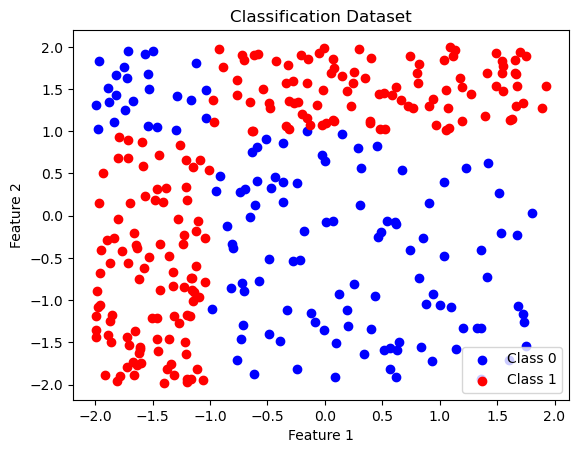

In [41]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.legend()
plt.show()

In [47]:
tree = ClassificationTree(maxDepth=1)

In [48]:
tree.fit(X, y)

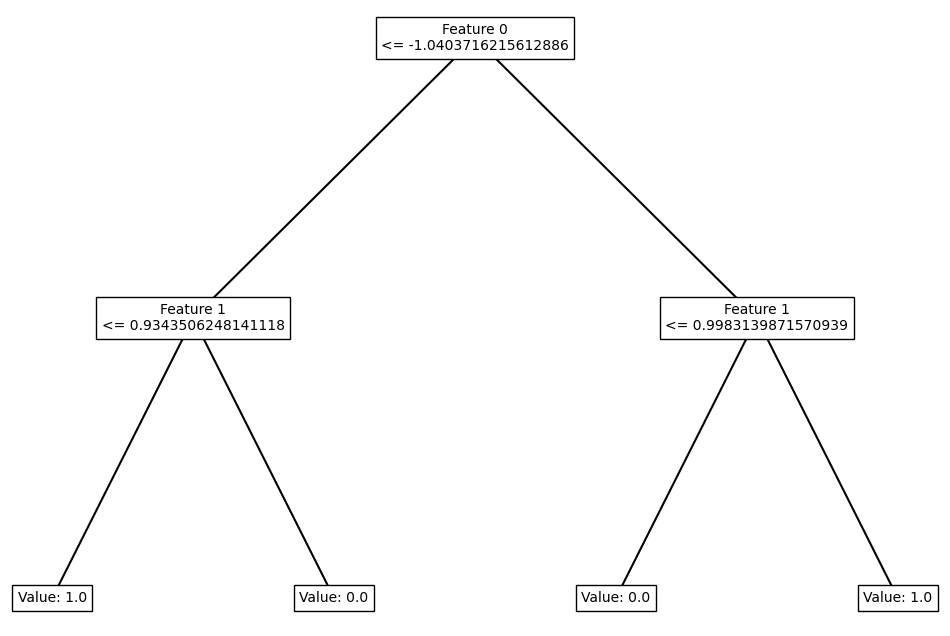

In [49]:
plot_tree(tree.root)

In [50]:
def plot_node(ax, node, x, y, dx, dy):
    if node is None:
        return
    if node.value is not None:
        ax.text(x, y, f"Value: {node.value}", ha='center', va='center', 
                bbox=dict(facecolor='white', edgecolor='black'))
    else:
        ax.text(x, y, f"Feature {node.feature}\n<= {node.threshold}", ha='center', va='center', 
                bbox=dict(facecolor='white', edgecolor='black'))
        if node.left:
            ax.plot([x, x - dx], [y, y - dy], 'k-')
            plot_node(ax, node.left, x - dx, y - dy, dx / 2, dy)
        if node.right:
            ax.plot([x, x + dx], [y, y - dy], 'k-')
            plot_node(ax, node.right, x + dx, y - dy, dx / 2, dy)

def plot_tree(node):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('off')
    plot_node(ax, node, x=0.5, y=1, dx=0.25, dy=0.1)
    plt.show()

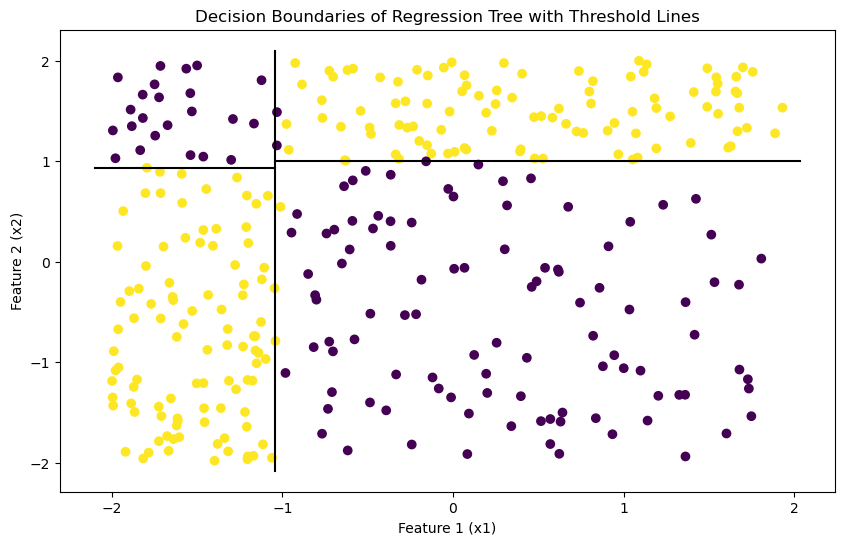

In [52]:
def plot_thresholds(ax, node, x_min, x_max, y_min, y_max):
    if node is None or node.value is not None:
        return

    if node.feature == 0:
        ax.plot([node.threshold, node.threshold], [y_min, y_max], 'k-')
        plot_thresholds(ax, node.left, x_min, node.threshold, y_min, y_max)
        plot_thresholds(ax, node.right, node.threshold, x_max, y_min, y_max)
    elif node.feature == 1:
        ax.plot([x_min, x_max], [node.threshold, node.threshold], 'k-')
        plot_thresholds(ax, node.left, x_min, x_max, y_min, node.threshold)
        plot_thresholds(ax, node.right, x_min, x_max, node.threshold, y_max)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap='viridis')

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

plot_thresholds(ax, tree.root, x_min, x_max, y_min, y_max)

ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_title('Decision Boundaries of Regression Tree with Threshold Lines')
plt.show()